# Bank Customer Segmentation 

## 1. Introduction
- About Dataset
- Problem Statement
- Questions to Asks
- Goals / Objectives 

### About Dataset
This project used data from kaggle created by Shivam Bansal. The dataset was about customer transactions dataset for a bank in India that consists of 1 million+ transactions from over 800k customers in August - October in year 2016. The data was collected as a part of research project in collaboration with a bank. The details about the features that i will analyze as following: 

feat = df.columns
feat = feat.to_list()
Desc = ['Unite Transaction ID',
       'Unique Customer ID', 
       'Date of Birth', 
       'Gender',
       'Location',
       'Account Balance', 
       'Transaction date', 
       'Transaction Time', 
       'Amount in INR (Indian Rupee)']

In [ ]:
abt_data = pd.DataFrame(data = feat, columns = ['Feature Names'])
abt_data['Description'] = Desc
abt_data

### Problem Statement
- We could improve bank A's customers retention by providing personalized marketing so then bank A's could increase their revenue. In order to reach that, we need to create a customer segmentation analysis that could group customers based on certain characteristics and EDA to support the analysis. The results will be used by marketing team for planning their new marketing srategy.
- We don't perform prediction of any features in this dataset. We will focusing on unsupervised learning instead of supervised learning

### Questions to Asks 
1. How many transactions, customers and total amount of customer transactions ? 
2. What is sum, mean & median of transactions and account balance of customer transactions ? 
3. How many customer based on age, gender and locations ? 
4. Further Analysis Coming Soon

### Goals / Objectives 
1. Understand About the Data By Answering all 4 Questions in EDA process
2. Performed Customer Segmentation Using K Means Clustering 
3. Identified Customer Demography from each Clusters

## 2. Import Modules, Load Data & Data Cleaning

In [2]:
import pandas as pd 
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

%matplotlib inline
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', None)


In [3]:
df = pd.read_csv('/kaggle/input/bank-customer-segmentation/bank_transactions.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


## 3. Data Exploration & Cleaning

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustAccountBalance,1046198.0,115403.540056,846485.380601,0.0,4721.76,16792.18,57657.36,1.150355e+08
TransactionTime,1048567.0,157087.529393,51261.854022,0.0,124030.00,164226.00,200010.00,2.359590e+05
TransactionAmount (INR),1048567.0,1574.335003,6574.742978,0.0,161.00,459.03,1200.00,1.560035e+06


In [5]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [6]:
# drop transac ID and Cust ID 
df.drop(['TransactionID', 'CustomerID', 'TransactionTime'], axis=1, inplace=True)

In [7]:
# convert Cust DOB to Datetime
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], dayfirst=True)
df['CustomerDOB'] = df['CustomerDOB'].apply(lambda x : x.strftime("%d-%m-%Y") if not pd.isna(x) else np.nan)

In [8]:
# convert TransactionDate to Datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], dayfirst=True)

In [9]:
# check missing values
df.isnull().sum()

CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionAmount (INR)       0
dtype: int64

In [10]:
df['CustomerDOB'].value_counts()

01-01-1800    57339
01-01-1989      809
01-01-1990      784
06-08-1991      699
01-01-1991      666
              ...  
03-09-2060        1
17-11-2052        1
11-09-2063        1
28-02-2047        1
24-10-2044        1
Name: CustomerDOB, Length: 17254, dtype: int64

In [11]:
df['TransactionDate'].value_counts()

2016-08-07    27261
2016-08-13    26921
2016-08-06    26585
2016-09-04    26564
2016-09-03    26431
2016-09-10    25761
2016-08-14    25596
2016-09-11    25454
2016-08-15    24171
2016-08-21    22986
2016-09-02    22839
2016-08-12    22438
2016-09-01    22327
2016-08-11    21833
2016-08-09    21823
2016-09-08    21765
2016-08-10    21649
2016-09-09    21568
2016-08-27    21469
2016-08-20    21339
2016-09-05    21221
2016-09-07    21161
2016-08-17    21121
2016-08-05    21112
2016-08-28    21054
2016-08-08    21042
2016-08-02    20948
2016-09-12    20753
2016-08-04    20682
2016-08-03    20615
2016-09-13    20601
2016-08-01    20438
2016-08-16    20414
2016-09-14    19969
2016-09-15    19754
2016-08-31    19711
2016-09-06    19640
2016-08-18    19453
2016-08-19    18714
2016-08-22    18558
2016-08-25    18546
2016-08-24    18026
2016-08-26    17742
2016-08-30    17430
2016-08-23    17374
2016-08-29    16882
2016-09-18    14689
2016-09-26    12460
2016-09-25     8164
2016-09-27     7447


In [12]:
# check duplicated data
df.duplicated().sum()

43898

In [13]:
# remove duplicated rows 
df.drop_duplicates(inplace=True)

**Findings**
We found several problem that appears from our data. We could point that out into three : 
1. `CustomerDOB`, `CustGender`, `CustLocation` and `CustAccountBalance` have relatively high number of missing values 
2. `CustomerDOB` has invalid values like "*01-01-1800*" or "*12-02-2067*"
3. Before perform any significant measure, we need to inspect them first by look at the data more carefully

In [14]:
# check missing values on CustGender
df[df['CustGender'].isna()]

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR)
176,01-01-1800,NaN,NAVI MUMBAI,8512.28,2016-08-12,3449.00
2124,01-01-1800,NaN,BANGALORE,7115.05,2016-10-21,584.06
5061,01-01-1800,NaN,MUMBAI,10669.85,2016-09-22,1500.00
13035,01-01-1800,NaN,MULUND WEST,65989.63,2016-09-26,336.52
14878,01-01-1800,NaN,NAVI MUMBAI,603.00,2016-09-26,1494.00
...,...,...,...,...,...,...
1034579,12-12-2050,NaN,MUMBAI,1091.50,2016-09-18,1168.00
1038102,01-01-1800,NaN,MUMBAI,6516.33,2016-09-18,100.00
1040773,01-01-1800,NaN,MUMBAI,25.00,2016-09-18,100.00
1044782,01-01-1800,NaN,JAIPUR,2222.22,2016-09-18,8335.00


- We found a pattern where if CustGender values missing, so in CustomerDOB values invalied 
- We would verify this pattern by add more filter

In [15]:
df[(df['CustGender'].isna()) & (df['CustomerDOB'] == '01-01-1800')]

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR)
176,01-01-1800,NaN,NAVI MUMBAI,8512.28,2016-08-12,3449.00
2124,01-01-1800,NaN,BANGALORE,7115.05,2016-10-21,584.06
5061,01-01-1800,NaN,MUMBAI,10669.85,2016-09-22,1500.00
13035,01-01-1800,NaN,MULUND WEST,65989.63,2016-09-26,336.52
14878,01-01-1800,NaN,NAVI MUMBAI,603.00,2016-09-26,1494.00
...,...,...,...,...,...,...
1033671,01-01-1800,NaN,NAVI MUMBAI,1294.44,2016-09-18,392.67
1038102,01-01-1800,NaN,MUMBAI,6516.33,2016-09-18,100.00
1040773,01-01-1800,NaN,MUMBAI,25.00,2016-09-18,100.00
1044782,01-01-1800,NaN,JAIPUR,2222.22,2016-09-18,8335.00


- We can assumed that probably caused by an error in bank system record so the data could not stored properly 
- Let's check the missing values of `CustLocation` with relation to `CustomerDOB`

In [16]:
df[(df['CustLocation'].isna()) & (df['CustomerDOB'] == '01-01-1800')]

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR)


- The missing values in location doesn't related to systemic error that happens in gender
- Let's check with the `CustAccountBalance`

In [17]:
df[(df['CustAccountBalance'].isna()) & (df['CustomerDOB'] == '01-01-1800')]

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR)
46189,01-01-1800,M,NEW DELHI,NaN,2016-08-03,1000.00
52180,01-01-1800,F,BANGALORE,NaN,2016-08-03,706.58
53026,01-01-1800,M,MUMBAI,NaN,2016-08-03,2094.00
60462,01-01-1800,M,NEW DELHI,NaN,2016-08-03,438.00
66458,01-01-1800,M,NAVI MUMBAI,NaN,2016-08-02,1134.00
...,...,...,...,...,...,...
979397,01-01-1800,M,NEW DELHI,NaN,2016-09-15,1000.00
998105,01-01-1800,M,HYDERABAD,NaN,2016-09-14,96.00
1014416,01-01-1800,F,JOGESHWARI WEST MUMBAI,NaN,2016-09-14,570.00
1033830,01-01-1800,M,MUMBAI,NaN,2016-09-18,382.69


- After seen the results above, there is a pattern that same appeared in gender. Where account balance missing is missing, the date value is **01-01-1800**
- Another explanation that could explain that phenomenon is that probably some customer are refused to sharing account balance information into bank information system

**Treatment (In Order)**
1. Remove gender where the DOB is '01-01-1800'
2. Remove Account Balance where the DOB is '01-01-1800' 
3. Remove DOB where DOB is '01-01-1800' and Replace the Rest with "Unidentified"
4. Replace Account Balance with Mean values 
5. Replaced location with Mode values 
6. Create Age variable from Customer DOB

In [18]:
df2 = df.copy()
print(f'Number of Missing Values (Before Treatment) : {df.isnull().sum().sum()}')

Number of Missing Values (Before Treatment) : 6626


In [19]:
# treatment no 1
df2.dropna(subset = ['CustGender'], inplace=True)
print(f'Number of Missing Values : {df2.isnull().sum().sum()}')

Number of Missing Values : 5560


In [20]:
# treatment no 2 
df2.drop(df2[(df2['CustAccountBalance'].isna()) & (df2['CustomerDOB'] == '01-01-1800')].index, 
         inplace=True)
print(f'Number of Missing Values : {df2.isnull().sum().sum()}')

Number of Missing Values : 5395


In [21]:
# treatment no 3 
df2.drop(df2[df2['CustomerDOB'] == '01-01-1800'].index, inplace=True)
df2['CustomerDOB'] = df2['CustomerDOB'].fillna('Unidentified')
print(f'Number of Missing Values : {df2.isnull().sum().sum()}')

Number of Missing Values : 2208


In [22]:
# treatment no 4
mean = df2['CustAccountBalance'].mean(skipna=True) 
df2['CustAccountBalance'] = df2['CustAccountBalance'].fillna(mean)
print(f'Number of Missing Values : {df2.isnull().sum().sum()}')

Number of Missing Values : 147


In [23]:
# treatment no 5
mode = df2['CustLocation'].mode() 
df2['CustLocation'] = df2['CustLocation'].fillna('Mumbai')
print(f'Number of Missing Values : {df2.isnull().sum().sum()}')

Number of Missing Values : 0


In [24]:
# create age variables 
year = pd.to_datetime(df2['CustomerDOB'], errors = 'coerce').dt.year.values 
age = 2016 - year
age = age
df2['age'] = age
df2['age'] = df2['age'].abs()

In [25]:
df2.isnull().sum().sum()

3187

In [26]:
df2.dropna(inplace=True)
df2.drop('CustomerDOB', axis=1, inplace=True)

In [27]:
df2.isnull().sum().sum()

0

In [28]:
df2.reset_index(drop=True, inplace=True)

In [29]:
df2.isnull().sum().sum()

0

In [30]:
df = df2.copy()

In [31]:
mean_trans = df['TransactionAmount (INR)'].mean()
q25, q75 = percentile(df['TransactionAmount (INR)'], 25), percentile(df['TransactionAmount (INR)'], 75)
iqr = q75 - q25
cutoff = iqr * 1.5
lower, upper = q25 - cutoff, q75 + cutoff
print(f'Lower :{lower}, Upper {upper}')

Lower :-1311.5, Upper 2612.5


In [32]:
df.drop(df[df['TransactionAmount (INR)'] > upper].index, inplace=True)

In [33]:
len(df[df['TransactionAmount (INR)']> upper])

0

In [34]:
mean_acc = df['CustAccountBalance'].mean()
q25, q75 = percentile(df['CustAccountBalance'], 25), percentile(df['CustAccountBalance'], 75)
iqr = q75 - q25 
cutoff = iqr * 1.5
lower, upper = q25 - cutoff, q75 + cutoff

In [35]:
df.drop(df[df['CustAccountBalance'] > upper].index, inplace=True)

In [36]:
len(df[df['CustAccountBalance']> upper])

0

In [37]:
df['age'] = df['age'].abs()

In [38]:
df.isnull().sum().sum()

0

## 4. Exploratory Data Analysis
### Questions to Asks 
1. How many total transaction amount & total accountbalance amount ? (using table)
2. What is sum, mean & median of transactions and account balance of customer transactions ? (using boxplot & histogram)
3. How differ account balance based on age and gender ? (using histogram)
4. How differ transaction based on age and  gender? (using histogram)
5. How transactions trends in year 2016 ? 

In [39]:
# setting style for future visualizations
plt.style.use('fivethirtyeight')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738110 entries, 0 to 947373
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   CustGender               738110 non-null  object        
 1   CustLocation             738110 non-null  object        
 2   CustAccountBalance       738110 non-null  float64       
 3   TransactionDate          738110 non-null  datetime64[ns]
 4   TransactionAmount (INR)  738110 non-null  float64       
 5   age                      738110 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 39.4+ MB


In [41]:
# question 1 
tot_trans = sum(round(df['TransactionAmount (INR)'], 2))
tot_acc = sum(round(df['CustAccountBalance'], 2))
finan_series = pd.Series({'Total Transactions' : tot_trans, 'Total Account' : tot_acc})
finan_report = pd.DataFrame({'Total Transactions' : finan_series[0], 'Total Account Balance' : finan_series[1]}, index = [0])

In [42]:
df[['CustAccountBalance', 'TransactionAmount (INR)']].describe().T

,count,mean,std,min,25%,50%,75%,max
CustAccountBalance,738110.0,21144.154393,25194.704991,0.0,3330.68,11339.18,29094.96,113423.07
TransactionAmount (INR),738110.0,546.041880,577.633445,0.0,120.00,315.00,766.66,2612.35


- Total Transactions in year 2016 period reach INR 145+ million
- Total Account Balance Customer Hold in year 2016 reach INR 10+ billion

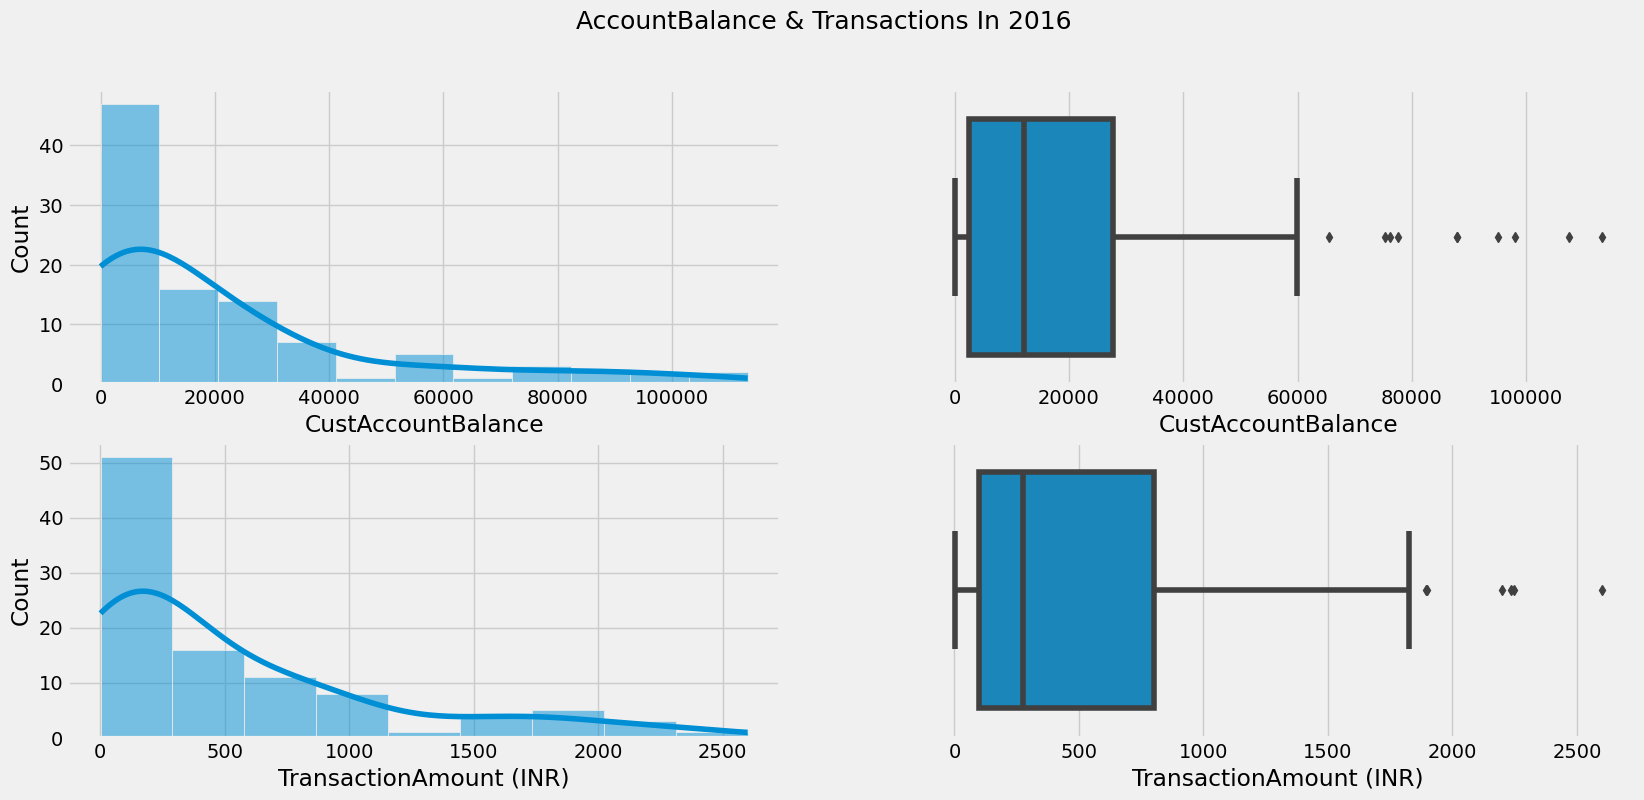

In [43]:
# question no 2 
fig, ax = plt.subplots(2, 2, figsize = (18,8))

# Set the main title of the figure
plt.suptitle('AccountBalance & Transactions In 2016', size = 18)

ax[0,0] = sns.histplot(df[0:100], x='CustAccountBalance', ax=ax[0,0], kde = True)
ax[1,0] = sns.histplot(df[0:100], x='TransactionAmount (INR)', ax=ax[1,0], kde = True)
ax[0,1] = sns.boxplot(df[0:100], x='CustAccountBalance', ax=ax[0,1], orient = 'h')
ax[1,1] = sns.boxplot(df[0:100], x='TransactionAmount (INR)', ax=ax[1,1], orient = 'h')

# Show the figure
plt.show()

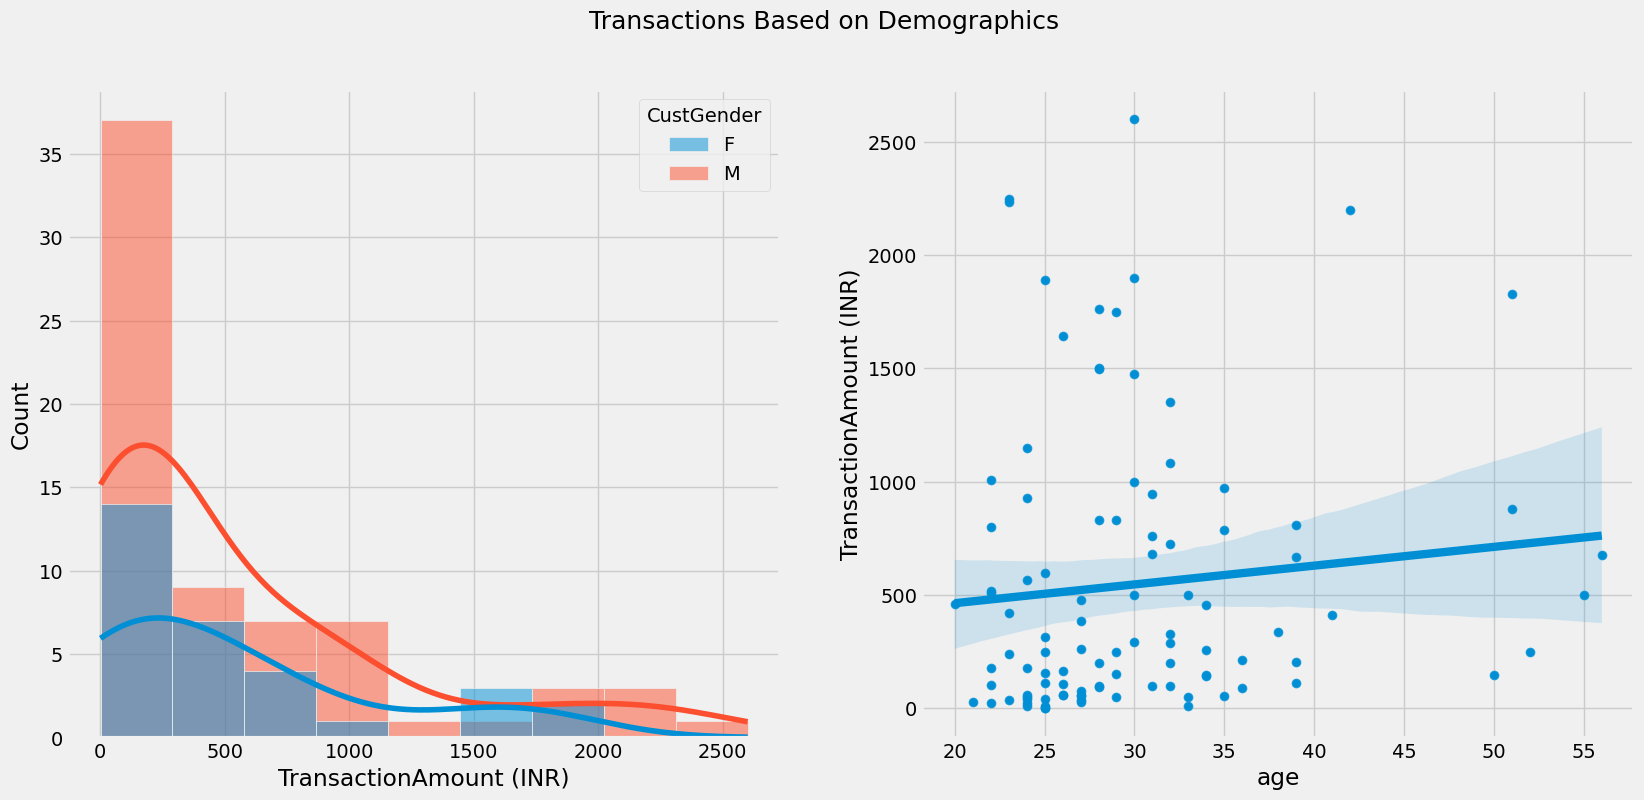

In [44]:
# question no 2 
fig, ax = plt.subplots(1,2, figsize = (18,8))

# Set the main title of the figure
plt.suptitle('Transactions Based on Demographics', size = 18)

ax[0] = sns.histplot(df[0:100], x='TransactionAmount (INR)', ax = ax[0],kde = True, hue ='CustGender')
ax[1] = sns.scatterplot(df[0:100], x='age', y='TransactionAmount (INR)',ax = ax[1])
ax[1] = sns.regplot(df[0:100], x='age', y='TransactionAmount (INR)',ax = ax[1])

# Show the figure
plt.show()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738110 entries, 0 to 947373
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   CustGender               738110 non-null  object        
 1   CustLocation             738110 non-null  object        
 2   CustAccountBalance       738110 non-null  float64       
 3   TransactionDate          738110 non-null  datetime64[ns]
 4   TransactionAmount (INR)  738110 non-null  float64       
 5   age                      738110 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 39.4+ MB


In [46]:
# Transaction trends in year 2016
df2 = df.copy()
df2.set_index('TransactionDate', inplace=True)
daily_total = df2.groupby(pd.Grouper(freq='W'))['TransactionAmount (INR)'].sum()

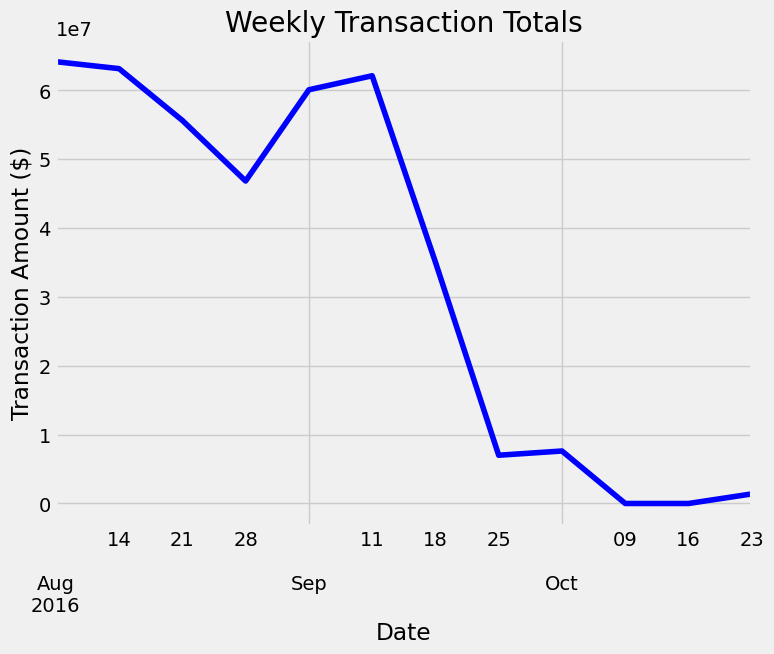

In [47]:
fig = plt.subplots(figsize = (8, 6))

daily_total.plot(color='blue', linestyle='solid')

plt.title('Weekly Transaction Totals')
plt.xlabel('Date')
plt.ylabel('Transaction Amount ($)')
plt.show()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738110 entries, 0 to 947373
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   CustGender               738110 non-null  object        
 1   CustLocation             738110 non-null  object        
 2   CustAccountBalance       738110 non-null  float64       
 3   TransactionDate          738110 non-null  datetime64[ns]
 4   TransactionAmount (INR)  738110 non-null  float64       
 5   age                      738110 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 39.4+ MB


**Insights**

# 5. Data Preprocessing  

In [49]:
df2 = df.copy()

In [50]:
from sklearn.preprocessing import StandardScaler

colnames = df2.columns 
num_columns = df2.select_dtypes(include=['float', 'int']).columns 
df2[num_columns] = StandardScaler().fit_transform(df2[num_columns])

In [51]:
X = df[['CustAccountBalance', 'TransactionAmount (INR)']]

# 6. Elbow Method 

In [52]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

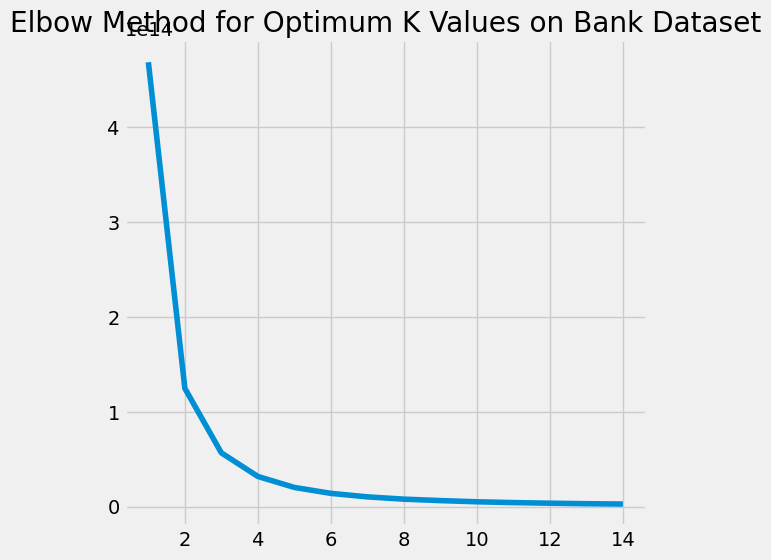

In [53]:
fig, ax = plt.subplots(figsize = (6,6))
    
plt.plot(range(1,15), wcss)

plt.title('Elbow Method for Optimum K Values on Bank Dataset')

plt.show()

Optimum k was k = 3

# 7. Unsupervised Learning 

In [54]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

X['cluster'] = y_kmeans

In [55]:
X1 = X[X['cluster'] == 0]
X2 = X[X['cluster'] == 1]
X3 = X[X['cluster'] == 2]

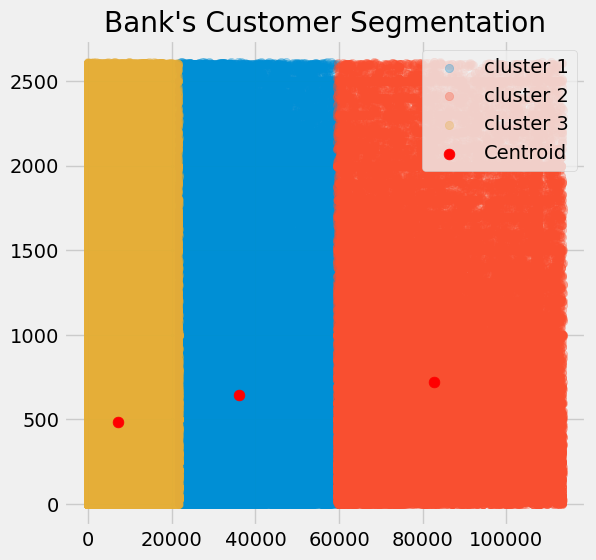

In [73]:
fig, ax = plt.subplots(figsize = (6,6))

plt.title("Bank's Customer Segmentation")

plt.scatter(X1.iloc[:,0], X1.iloc[:, 1], label = 'cluster 1', alpha = 0.3)
plt.scatter(X2.iloc[:,0], X2.iloc[:, 1], label = 'cluster 2', alpha = 0.3)
plt.scatter(X3.iloc[:,0], X3.iloc[:, 1], label = 'cluster 3', alpha = 0.3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
           label = 'Centroid', s= 60)

plt.legend()
plt.show()

In [57]:
df['Cluster'] = X['cluster']

In [58]:
clust_count = df['Cluster'].value_counts()

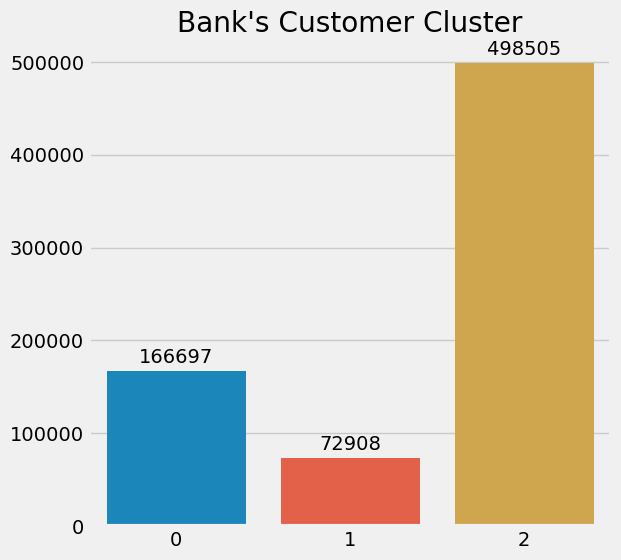

In [59]:
fig, ax = plt.subplots(figsize = (6,6))

plt.title("Bank's Customer Cluster")

ax = sns.barplot(x = clust_count.index, y = clust_count.values)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

# 8. Identify Bank Customer Demography from Each Cluster

In [60]:
clust1 = df[df['Cluster'] == 0]
clust2 = df[df['Cluster'] == 1]
clust3 = df[df['Cluster'] == 2]

[Text(0, 0, 'MUMBAI'),
 Text(1, 0, 'BANGALORE'),
 Text(2, 0, 'NEW DELHI'),
 Text(3, 0, 'GURGAON'),
 Text(4, 0, 'DELHI'),
 Text(5, 0, 'NOIDA'),
 Text(6, 0, 'CHENNAI'),
 Text(7, 0, 'PUNE'),
 Text(8, 0, 'THANE'),
 Text(9, 0, 'HYDERABAD'),
 Text(10, 0, 'KOLKATA'),
 Text(11, 0, 'GHAZIABAD'),
 Text(12, 0, 'AHMEDABAD'),
 Text(13, 0, 'NAVI MUMBAI'),
 Text(14, 0, 'FARIDABAD'),
 Text(15, 0, 'CHANDIGARH'),
 Text(16, 0, 'JAIPUR'),
 Text(17, 0, 'LUCKNOW'),
 Text(18, 0, 'SURAT'),
 Text(19, 0, 'MOHALI')]

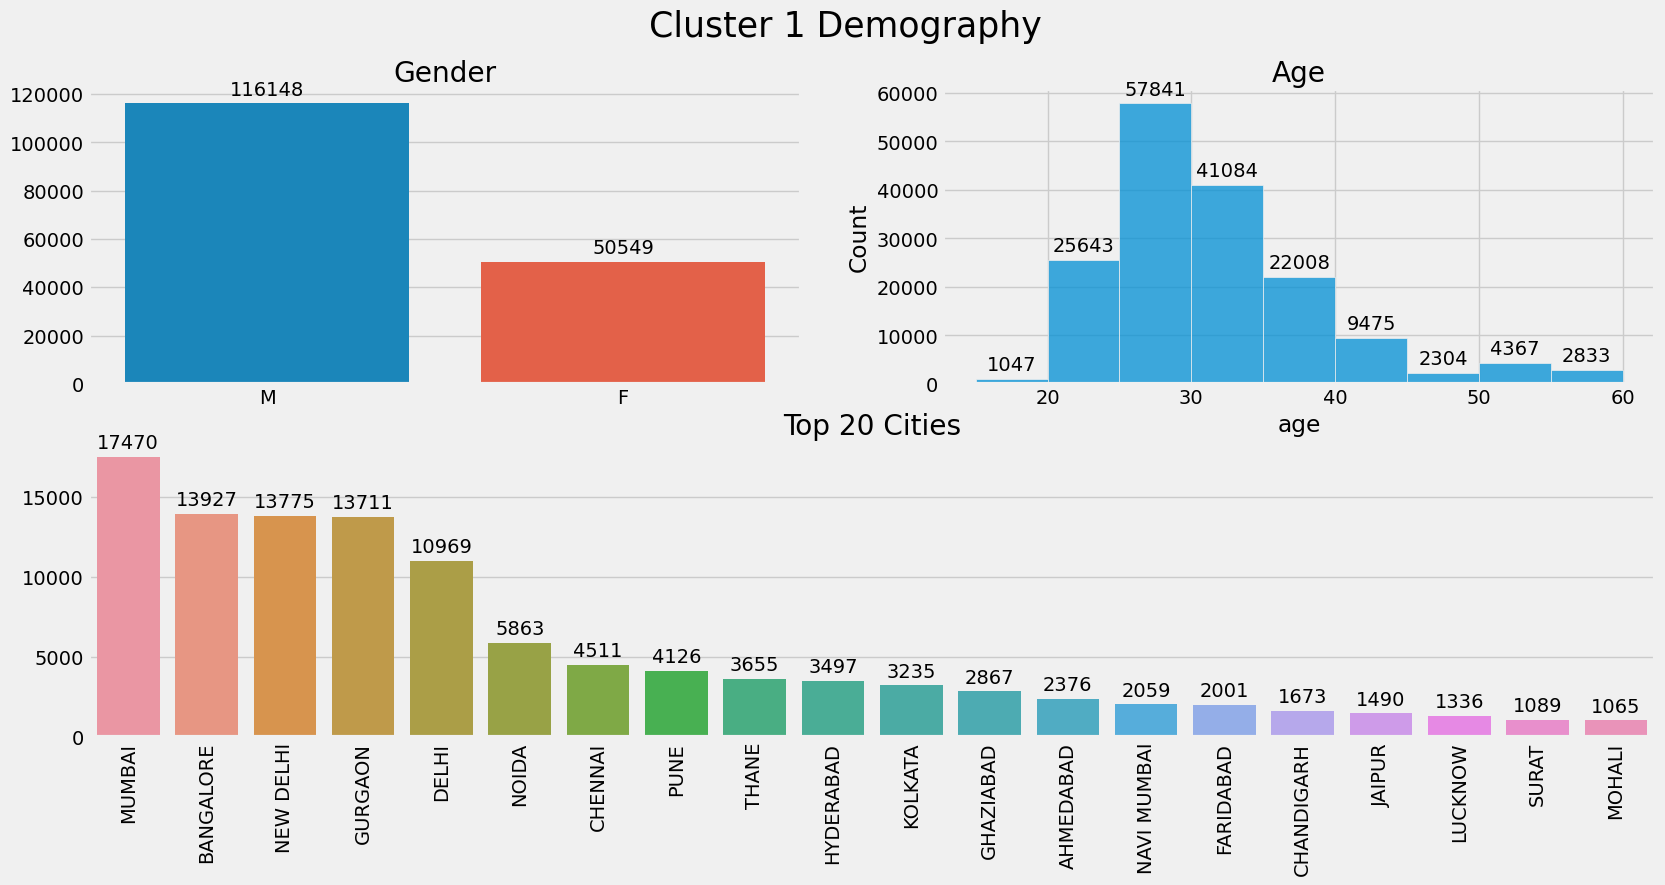

In [69]:
# identify cluster1
fig, ax = plt.subplots(2, 2, figsize = (18,8))
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

grid_shape = (2, 2)

plt.suptitle("Cluster 1 Demography", size = 25)

ax1 = plt.subplot2grid(grid_shape, (0, 0))
ax1 = sns.barplot(x=clust1['CustGender'].value_counts().index, y = clust1['CustGender'].value_counts().values)
ax1.set_title('Gender')

ax2 = plt.subplot2grid(grid_shape, (0, 1))
ax2 = sns.histplot(clust1['age'], bins = bins)
ax2.set_title('Age')

ax3 = plt.subplot2grid(grid_shape, (1, 0), colspan=2)
ax3 = sns.barplot(x=clust1['CustLocation'].value_counts()[0:20].index, y = clust1['CustLocation'].value_counts()[0:20].values)
ax3.set_title('Top 20 Cities')


for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

ax3.set_xticklabels(clust1['CustLocation'].value_counts()[0:20].index, rotation=90)

[Text(0, 0, 'MUMBAI'),
 Text(1, 0, 'BANGALORE'),
 Text(2, 0, 'NEW DELHI'),
 Text(3, 0, 'GURGAON'),
 Text(4, 0, 'DELHI'),
 Text(5, 0, 'NOIDA'),
 Text(6, 0, 'CHENNAI'),
 Text(7, 0, 'PUNE'),
 Text(8, 0, 'THANE'),
 Text(9, 0, 'HYDERABAD'),
 Text(10, 0, 'KOLKATA'),
 Text(11, 0, 'GHAZIABAD'),
 Text(12, 0, 'AHMEDABAD'),
 Text(13, 0, 'NAVI MUMBAI'),
 Text(14, 0, 'FARIDABAD'),
 Text(15, 0, 'CHANDIGARH'),
 Text(16, 0, 'JAIPUR'),
 Text(17, 0, 'LUCKNOW'),
 Text(18, 0, 'SURAT'),
 Text(19, 0, 'MOHALI')]

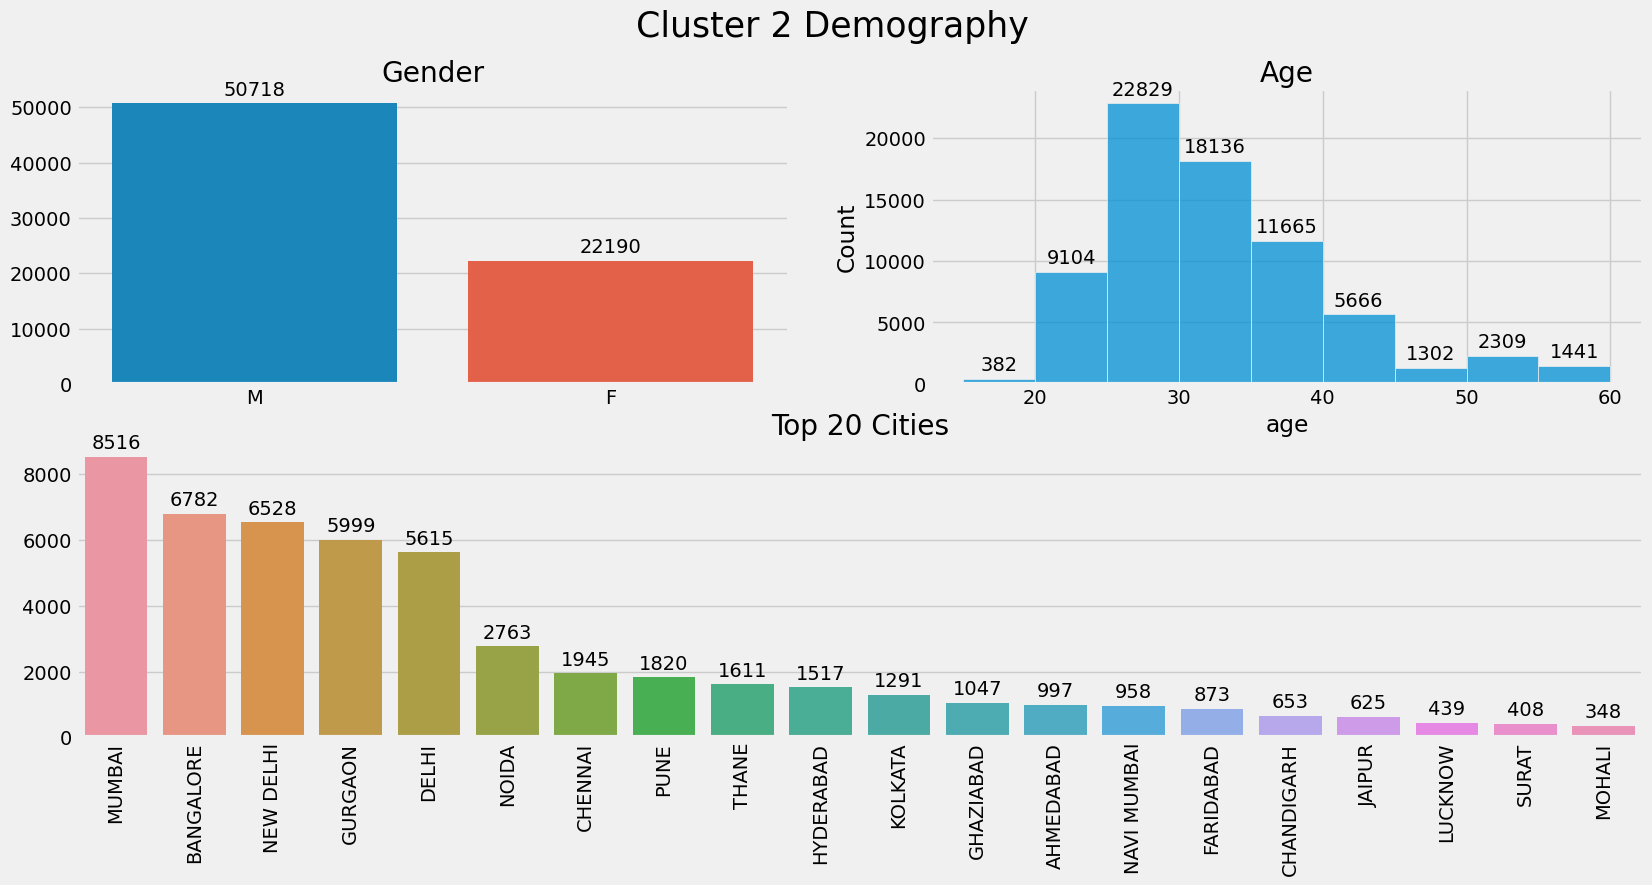

In [71]:
# identify cluster2
fig, ax = plt.subplots(2, 2, figsize = (18,8))
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

grid_shape = (2, 2)

plt.suptitle("Cluster 2 Demography", size = 25)

ax1 = plt.subplot2grid(grid_shape, (0, 0))
ax1 = sns.barplot(x=clust2['CustGender'].value_counts().index, y = clust2['CustGender'].value_counts().values)
ax1.set_title('Gender')

ax2 = plt.subplot2grid(grid_shape, (0, 1))
ax2 = sns.histplot(clust2['age'], bins = bins)
ax2.set_title('Age')

ax3 = plt.subplot2grid(grid_shape, (1, 0), colspan=2)
ax3 = sns.barplot(x=clust2['CustLocation'].value_counts()[0:20].index, y = clust2['CustLocation'].value_counts()[0:20].values)
ax3.set_title('Top 20 Cities')

for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

ax3.set_xticklabels(clust1['CustLocation'].value_counts()[0:20].index, rotation=90)

[Text(0, 0, 'MUMBAI'),
 Text(1, 0, 'BANGALORE'),
 Text(2, 0, 'NEW DELHI'),
 Text(3, 0, 'GURGAON'),
 Text(4, 0, 'DELHI'),
 Text(5, 0, 'NOIDA'),
 Text(6, 0, 'CHENNAI'),
 Text(7, 0, 'PUNE'),
 Text(8, 0, 'THANE'),
 Text(9, 0, 'HYDERABAD'),
 Text(10, 0, 'KOLKATA'),
 Text(11, 0, 'GHAZIABAD'),
 Text(12, 0, 'AHMEDABAD'),
 Text(13, 0, 'NAVI MUMBAI'),
 Text(14, 0, 'FARIDABAD'),
 Text(15, 0, 'CHANDIGARH'),
 Text(16, 0, 'JAIPUR'),
 Text(17, 0, 'LUCKNOW'),
 Text(18, 0, 'SURAT'),
 Text(19, 0, 'MOHALI')]

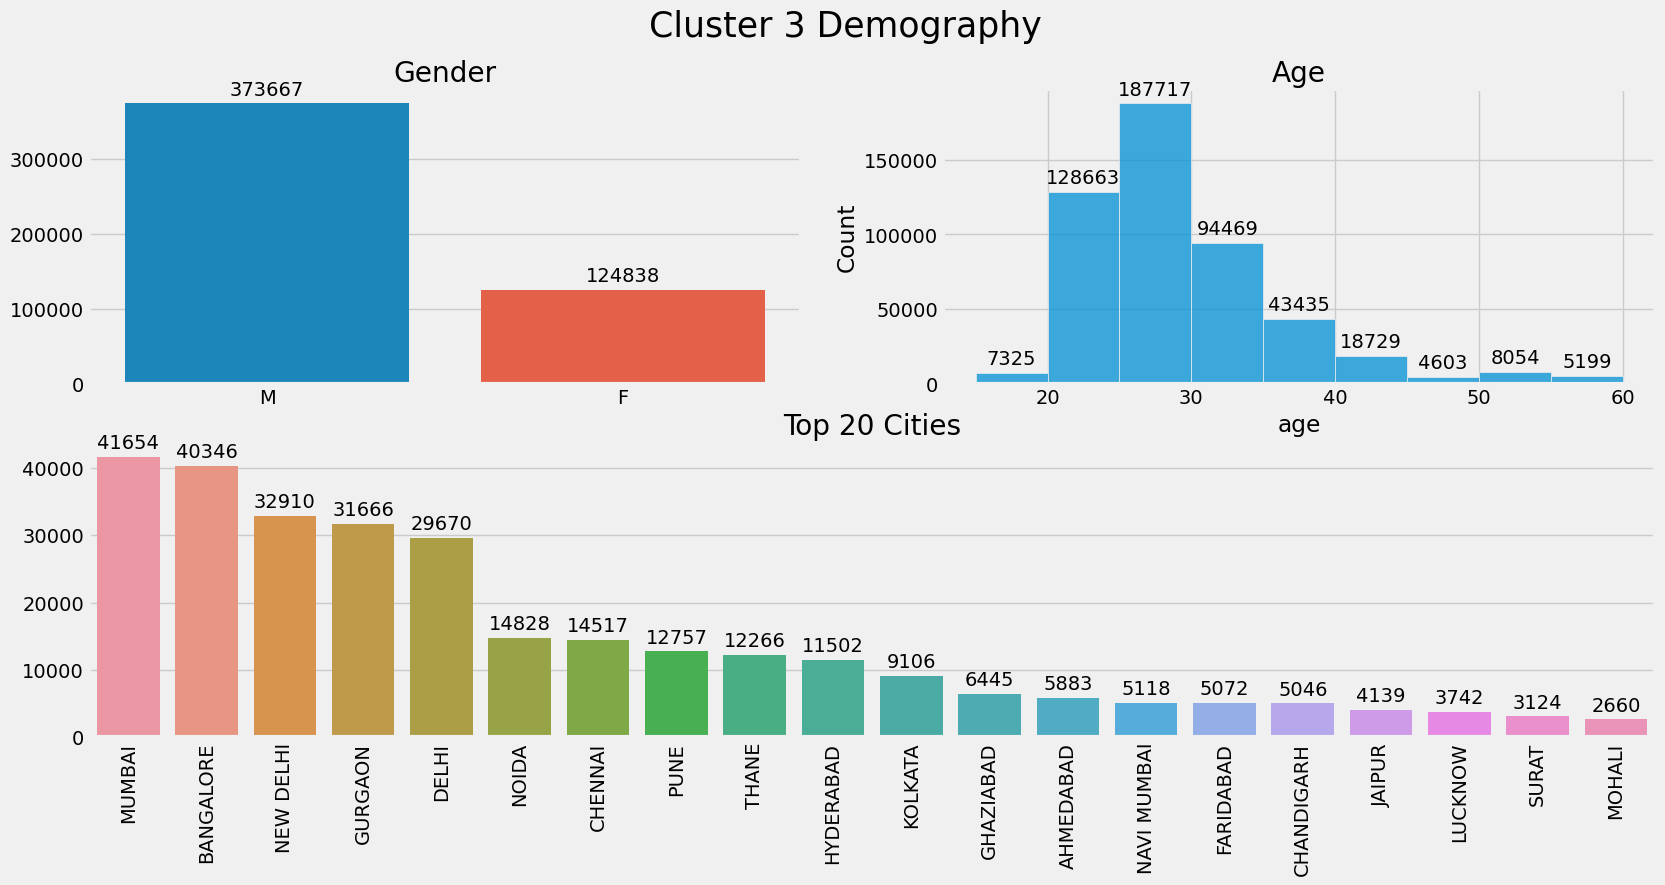

In [72]:
# identify cluster3
fig, ax = plt.subplots(2, 2, figsize = (18,8))
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

grid_shape = (2, 2)

plt.suptitle("Cluster 3 Demography", size = 25)

ax1 = plt.subplot2grid(grid_shape, (0, 0))
ax1 = sns.barplot(x=clust3['CustGender'].value_counts().index, y = clust3['CustGender'].value_counts().values)
ax1.set_title('Gender')

ax2 = plt.subplot2grid(grid_shape, (0, 1))
ax2 = sns.histplot(clust3['age'], bins = bins)
ax2.set_title('Age')

ax3 = plt.subplot2grid(grid_shape, (1, 0), colspan=2)
ax3 = sns.barplot(x=clust3['CustLocation'].value_counts()[0:20].index, y = clust3['CustLocation'].value_counts()[0:20].values)
ax3.set_title('Top 20 Cities')


for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

ax3.set_xticklabels(clust1['CustLocation'].value_counts()[0:20].index, rotation=90)

# Conclusion
1. Bank X has 3 different group of customers. Which if clusterized into different group using resulting a customer group which has similar transaction amount, but has significant different from account balance as following :
    - Cluster 1 = Low Amount account balance 
    - Cluster 2 = Medium Amount account balance 
    - Cluster 3 = High Amount account balance
2. Further analysis by demographics, there is not much differentiation from gender and location except by age group. Specific on Young cusomters (20 - 25 year old). Where :
    - Cluster 1 = Has a moderate number of young customer compared to cluster 1 & cluster 3
    - Cluster 2 = Has a lowest number of young customer compared to cluster 1 & cluster 3
    - Cluster 3 = Has a highest number of young customer compared to cluster 1 & cluster 3
3. This analysis could be used by marketing and product team to customize financial product that could attract for each cluster

# Further Improvement (Coming Soon)
- Clean the code
- Identify Transaction behaviour from each cluster 
- Create more narrative so it could be more understandable